In [35]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv("/content/drive/MyDrive/ML/train.csv")
dfTest = pd.read_csv("/content/drive/MyDrive/ML/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/ML/sample-submission.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:
df.drop("Index", axis=1, inplace=True)
dfTest.drop("Id", axis=1, inplace=True)

In [6]:
df

,Code,Blue,Green,Red,NIR
0,10,0,0,0,0
1,10,1997,1982,1860,3672
2,10,1950,1906,1776,3335
3,10,1933,1886,1742,3390
4,10,2162,2035,2173,3605
...,...,...,...,...,...
967000,0,2358,2125,1996,1893
967001,0,2375,2085,1948,1897
967002,0,2356,2044,1952,1877
967003,0,2331,2050,1961,1884


In [132]:
scaled_df

,Code,Blue,Green,Red,NIR
0,10,0.000000,0.000000,0.000000,0.000000
1,10,0.182959,0.174211,0.131887,0.239327
2,10,0.178653,0.167531,0.125931,0.217363
3,10,0.177096,0.165773,0.123520,0.220948
4,10,0.198076,0.178870,0.154081,0.234961
...,...,...,...,...,...
967000,0,0.216033,0.186780,0.141530,0.123379
967001,0,0.217590,0.183264,0.138127,0.123639
967002,0,0.215850,0.179661,0.138410,0.122336
967003,0,0.213559,0.180188,0.139048,0.122792


In [14]:
dfTest.head(5)

,Blue,Green,Red,NIR
0,0,0,0,0
1,1938,1880,1683,3362
2,1943,1874,1661,3388
3,1959,1876,1690,3354
4,1943,1873,1696,3305


In [15]:
df.tail()

,Code,Blue,Green,Red,NIR
966990,80,2355,2127,1986,1917
966991,80,2382,2115,2001,1934
966992,80,2398,2146,2011,1965
966993,80,2346,2105,2004,1917
966994,80,2329,2065,1985,1882


In [16]:
dfTest.tail()

,Blue,Green,Red,NIR
4620304,1880,1590,1366,1235
4620305,1891,1594,1369,1237
4620306,1879,1591,1375,1242
4620307,1879,1584,1378,1242
4620308,1881,1589,1376,1241


In [38]:
df_ndwi = np.empty(967005)
df_ndvi = np.zeros(967005)

In [39]:
for i in range(len(df)):
    df_ndwi[i] = np.divide(np.subtract(df["Green"][i], df["NIR"][i]), np.add(df["Green"][i], df["NIR"][i]))

<ipython-input-39-74a6449493cf>:2: RuntimeWarning: invalid value encountered in true_divide
  ndwiArr[i] = np.divide(np.subtract(df["Green"][i], df["NIR"][i]), np.add(df["Green"][i], df["NIR"][i]))


In [40]:
for i in range(len(df)):
    df_ndvi[i] = np.divide(np.subtract(df["NIR"][i], df["Red"][i]), np.add(df["NIR"][i], df["Red"][i]))

<ipython-input-40-3dfff50a3bfe>:2: RuntimeWarning: invalid value encountered in true_divide
  ndviArr[i] = np.divide(np.subtract(df["NIR"][i], df["Red"][i]), np.add(df["NIR"][i], df["Red"][i]))


In [41]:
df.insert(5, "NDWI", df_ndwi, True)
df.insert(6, "NDVI", df_ndvi, True)

In [42]:
df['NDWI']=df['NDWI'].fillna(0)
df['NDVI']=df['NDVI'].fillna(0)

df = df[df.NIR != 0]
df = df[df.NDWI != 0]
df = df[df.NDVI != 0]

In [43]:
df.drop(df[(df["Code"] == 70) | (df["Code"] == 0) | (df["Code"] == 95) | (df["Code"] == 100) ].index, inplace = True)

In [44]:
dfCode = df["Code"]
df.drop("Code", axis=1, inplace=True)

In [141]:
df

,Blue,Green,Red,NIR,NDWI,NDVI
1,0.182959,0.174211,0.131887,0.239327,-0.157461,0.289430
2,0.178653,0.167531,0.125931,0.217363,-0.129469,0.266339
3,0.177096,0.165773,0.123520,0.220948,-0.142673,0.282836
4,0.198076,0.178870,0.154081,0.234961,-0.135541,0.207895
5,0.197801,0.190296,0.149755,0.235352,-0.105851,0.222266
...,...,...,...,...,...,...
966990,0.215758,0.186956,0.140821,0.124943,0.198824,-0.059745
966991,0.218232,0.185901,0.141885,0.126051,0.191858,-0.059095
966992,0.219698,0.188626,0.142594,0.128071,0.191207,-0.053654
966993,0.214934,0.185022,0.142097,0.124943,0.193826,-0.064239


In [45]:
dfT_ndwi = np.zeros(4620309)
dfT_ndvi = np.zeros(4620309)

In [46]:
for i in range(len(dfTest)):
    dfT_ndwi[i] = np.divide(np.subtract(dfTest["Green"][i], dfTest["NIR"][i]), np.add(dfTest["Green"][i], dfTest["NIR"][i]))

<ipython-input-46-444a6f3331c5>:2: RuntimeWarning: invalid value encountered in true_divide
  ndwiArr1[i] = np.divide(np.subtract(dfTest["Green"][i], dfTest["NIR"][i]), np.add(dfTest["Green"][i], dfTest["NIR"][i]))


In [47]:
for i in range(len(dfTest)):
    dfT_ndvi[i] = np.divide(np.subtract(dfTest["NIR"][i], dfTest["Red"][i]), np.add(dfTest["NIR"][i], dfTest["Red"][i]))

<ipython-input-47-394250f0b60b>:2: RuntimeWarning: invalid value encountered in true_divide
  ndviArr1[i] = np.divide(np.subtract(dfTest["NIR"][i], dfTest["Red"][i]), np.add(dfTest["NIR"][i], dfTest["Red"][i]))


In [48]:
dfTest.insert(4, "NDWI", dfT_ndwi, True)
dfTest.insert(5, "NDVI", dfT_ndvi, True)

In [49]:
dfTest['NDWI']=dfTest['NDWI'].fillna(0)
dfTest['NDVI']=dfTest['NDVI'].fillna(0)

In [46]:
dfTest

,Blue,Green,Red,NIR,NDWI,NDVI
0,0,0,0,0,0.000000,0.000000
1,1938,1880,1683,3362,-0.282717,0.332805
2,1943,1874,1661,3388,-0.287723,0.342048
3,1959,1876,1690,3354,-0.282600,0.329897
4,1943,1873,1696,3305,-0.276555,0.321736
...,...,...,...,...,...,...
4620304,1880,1590,1366,1235,0.125664,-0.050365
4620305,1891,1594,1369,1237,0.126104,-0.050652
4620306,1879,1591,1375,1242,0.123191,-0.050822
4620307,1879,1584,1378,1242,0.121019,-0.051908


In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=11)

# Fit
KNN.fit(df, dfCode)

#Predict
y_pred_KNN = KNN.predict(dfTest)

In [30]:
from google.colab import files
# Saving with "ID" and "Code" columns
dRF = pd.DataFrame({'Id': range(0, len(y_predKNN.T)), 'Code': y_predKNN.T})

# To .csv file
dRF.to_csv('KNN_Dropped.csv', index=False)

files.download('KNN_Dropped.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 98.2 MB/s eta 0:00:00


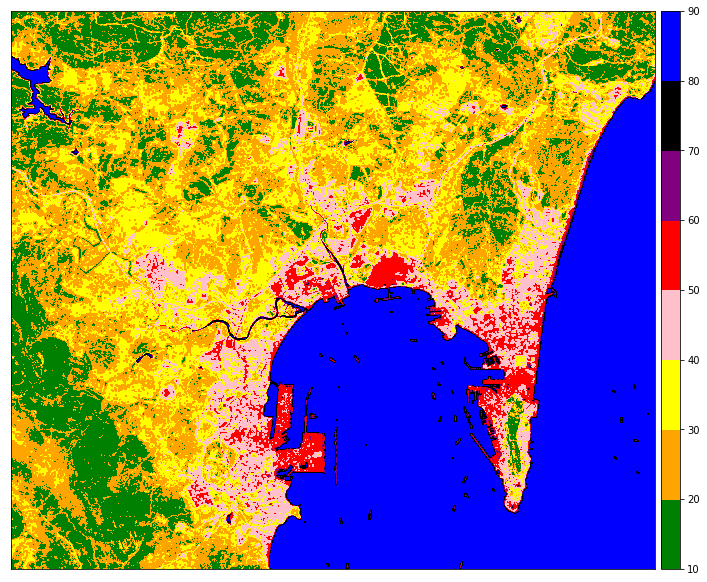

In [31]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_pred_KNN.reshape(2309, 2001).T,cmap=ListedColormap(['green','orange','yellow','pink','red','purple', 'black', 'blue']))

In [ ]:
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [ ]:
scaled_df

In [148]:
scalerT = MinMaxScaler()
scalerT.fit(dfTest)
scaledT = scalerT.fit_transform(dfTest)

scaled_dfTest = pd.DataFrame(scaledT, columns=dfTest.columns)

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()



nb.fit(df, dfCode)
y_pred_bayes = nb.predict(dfTest)

In [20]:
from google.colab import files
# Saving with "ID" and "Code" columns
dRF = pd.DataFrame({'Id': range(0, len(y_pred_bayes.T)), 'Code': y_pred_bayes.T})

# To .csv file
dRF.to_csv('SonBAyes.csv', index=False)

files.download('SonBAyes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

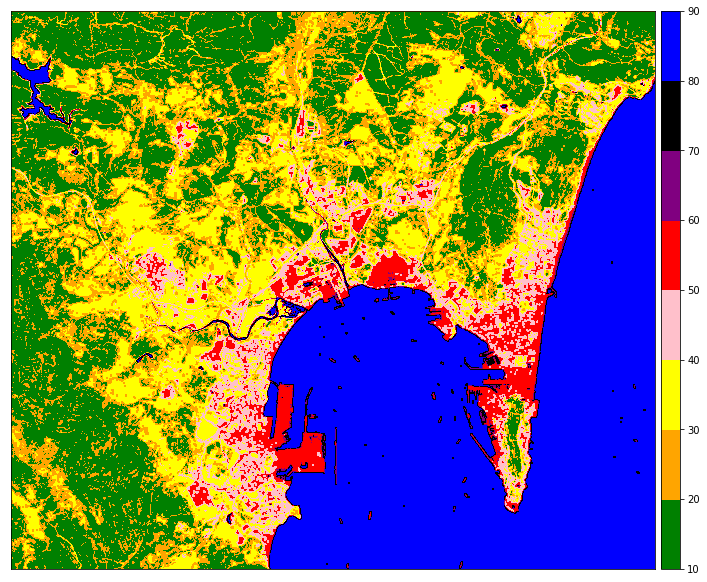

In [33]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

ep.plot_bands(y_pred_bayes.reshape(2309, 2001).T,cmap=ListedColormap(['green','orange','yellow','pink','red','purple', 'black', 'blue']))

In [ ]:
scaled_df

In [ ]:
scaled_dfTest

In [ ]:
scaled_dfTest

In [ ]:
df

In [ ]:
dfTest

In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=121, random_state=42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(df,dfCode)

y_pred=clf.predict(dfTest)

In [26]:
# Saving with "ID" and "Code" columns
from google.colab import files

dRF = pd.DataFrame({'Id': range(0, len(y_pred.T)), 'Code': y_pred.T})

# To .csv file
dRF.to_csv('RF_last.csv', index=False)

files.download('RF_last.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

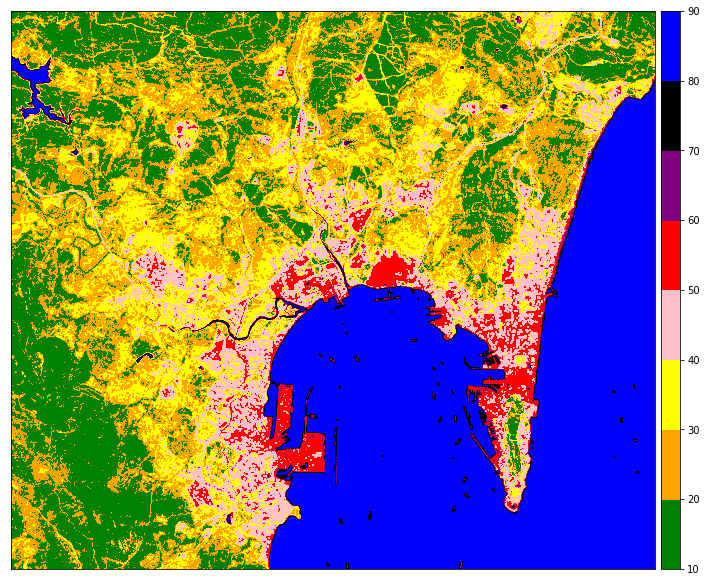

In [27]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

#'green','orange','yellow','pink','red','purple', 'black', 'blue'
#ep.plot_bands(y_pred.reshape(2309, 2001).T,cmap=ListedColormap(['blue','black','yellow','red','pink','purple', 'orange', 'green']))
ep.plot_bands(y_pred.reshape(2309, 2001).T,cmap=ListedColormap(['green','orange','yellow','pink','red','purple', 'black', 'blue']))

In [28]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

In [60]:
sample.drop("Id", axis=1, inplace=True)


KeyError: ignored

In [75]:
dfTest
y_pred_bayes[:947834]
classes=["true","false"]

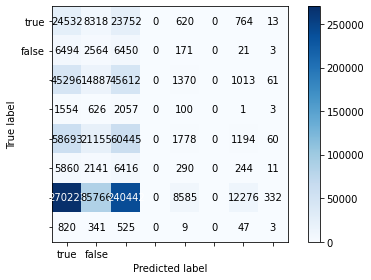

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix

conf_mtrx = confusion_matrix(dfCode,y_pred_bayes[:963938])

plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues)